<a href="https://colab.research.google.com/github/faizanali02/googlecolab/blob/main/AI_LAB04_233574.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
initial_state = 'A'
goal_state = 'D'

In [4]:
# ============================================
# Activity 1: Representation of Search Problem
# ============================================

class Problem:
    def __init__(self, initial, goal):
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return possible actions for a given state."""
        raise NotImplementedError

    def result(self, state, action):
        """Return new state after applying an action."""
        raise NotImplementedError

    def goal_test(self, state):
        """Check if goal is reached."""
        return state == self.goal


class SimpleGraphProblem(Problem):
    def __init__(self, initial, goal):
        super().__init__(initial, goal)
        self.graph = {
            'A': ['B', 'C'],
            'B': ['D'],
            'C': ['E'],
            'D': [],
            'E': []
        }

    def actions(self, state):
        return self.graph.get(state, [])

    def result(self, state, action):
        return action


def search_path(problem):
    frontier = [(problem.initial, [problem.initial])]
    while frontier:
        state, path = frontier.pop(0)
        if problem.goal_test(state):
            return path
        for action in problem.actions(state):
            new_state = problem.result(state, action)
            if new_state not in path:
                frontier.append((new_state, path + [new_state]))
    return None


# --- Run Example ---
problem = SimpleGraphProblem('A', 'D')
solution = search_path(problem)
print("Initial State:", problem.initial)
print("Goal State:", problem.goal)
print("Path Found:", solution)


Initial State: A
Goal State: D
Path Found: ['A', 'B', 'D']


In [5]:
# ============================================
# Activity 2: BFS and DFS Implementation
# ============================================

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'E': ['H', 'I'],
    'C': ['F', 'G'],
    'G': ['J']
}

# --- BFS ---
def bfs(graph, start, goal):
    visited = []
    queue = [start]
    print("BFS Traversal:")
    while queue:
        node = queue.pop(0)
        if node not in visited:
            print(node, end=" ")
            visited.append(node)
            if node == goal:
                print(f"\nGoal '{goal}' found!")
                return
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append(neighbor)
    print(f"\nGoal '{goal}' not found!")


# --- DFS ---
def dfs(graph, start, goal):
    visited = []
    stack = [start]
    print("\nDFS Traversal:")
    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.append(node)
            if node == goal:
                print(f"\nGoal '{goal}' found!")
                return
            for neighbor in reversed(graph.get(node, [])):
                if neighbor not in visited:
                    stack.append(neighbor)
    print(f"\nGoal '{goal}' not found!")


# --- Run Both ---
bfs(graph, 'A', 'F')
dfs(graph, 'A', 'F')


BFS Traversal:
A B C D E F 
Goal 'F' found!

DFS Traversal:
A B D E H I C F 
Goal 'F' found!


In [6]:
# ============================================
# Activity 3: BFS for 8-Puzzle Problem
# ============================================
from collections import deque

# --- Start & Goal ---
start_state = [
    ['1', '2', '3'],
    ['4', '-', '6'],
    ['7', '5', '8']
]

goal_state = [
    ['1', '2', '3'],
    ['4', '5', '6'],
    ['7', '8', '-']
]

actions = ['Up', 'Down', 'Left', 'Right']

def find_blank(state):
    for i in range(3):
        for j in range(3):
            if state[i][j] == '-':
                return i, j

def copy_state(state):
    return [row[:] for row in state]

def move(state, action):
    i, j = find_blank(state)
    new_state = copy_state(state)
    if action == 'Up' and i > 0:
        new_state[i][j], new_state[i-1][j] = new_state[i-1][j], new_state[i][j]
    elif action == 'Down' and i < 2:
        new_state[i][j], new_state[i+1][j] = new_state[i+1][j], new_state[i][j]
    elif action == 'Left' and j > 0:
        new_state[i][j], new_state[i][j-1] = new_state[i][j-1], new_state[i][j]
    elif action == 'Right' and j < 2:
        new_state[i][j], new_state[i][j+1] = new_state[i][j+1], new_state[i][j]
    else:
        return None
    return new_state

def is_goal(state):
    return state == goal_state

def state_to_tuple(state):
    return tuple(tuple(row) for row in state)

def bfs_8_puzzle(start):
    queue = deque([(start, [])])
    visited = set()
    while queue:
        state, path = queue.popleft()
        visited.add(state_to_tuple(state))
        if is_goal(state):
            return path
        for action in actions:
            new_state = move(state, action)
            if new_state and state_to_tuple(new_state) not in visited:
                queue.append((new_state, path + [action]))
    return None

solution = bfs_8_puzzle(start_state)
print("\nBFS Solution for 8-Puzzle:")
print("Moves:", solution)



BFS Solution for 8-Puzzle:
Moves: ['Down', 'Right']


In [7]:
# ============================================
# Activity 4: A* Search Algorithm for 8-Puzzle
# ============================================
import heapq

goal_positions = {goal_state[i][j]: (i, j) for i in range(3) for j in range(3)}

def heuristic_manhattan(state):
    h = 0
    for i in range(3):
        for j in range(3):
            tile = state[i][j]
            if tile != '-':
                goal_i, goal_j = goal_positions[tile]
                h += abs(i - goal_i) + abs(j - goal_j)
    return h

def a_star_8_puzzle(start):
    open_list = []
    heapq.heappush(open_list, (0, start, []))
    visited = set()
    g_cost = {state_to_tuple(start): 0}

    while open_list:
        f, state, path = heapq.heappop(open_list)
        visited.add(state_to_tuple(state))

        if is_goal(state):
            return path, len(visited)

        for action in actions:
            new_state = move(state, action)
            if not new_state:
                continue
            new_tuple = state_to_tuple(new_state)
            new_g = g_cost[state_to_tuple(state)] + 1
            if new_tuple not in g_cost or new_g < g_cost[new_tuple]:
                g_cost[new_tuple] = new_g
                f_cost = new_g + heuristic_manhattan(new_state)
                heapq.heappush(open_list, (f_cost, new_state, path + [action]))
    return None, len(visited)

solution, nodes_expanded = a_star_8_puzzle(start_state)
print("\nA* Solution for 8-Puzzle:")
print("Moves:", solution)
print("Total Nodes Expanded:", nodes_expanded)
print("Total Cost:", len(solution))



A* Solution for 8-Puzzle:
Moves: ['Down', 'Right']
Total Nodes Expanded: 3
Total Cost: 2


In [8]:
# Add counters:
generated_nodes = 0
expanded_nodes = 0


In [9]:
def weighted_manhattan(state):
    # Example: weight corner tiles more heavily
    h = 0
    for i in range(4):
        for j in range(4):
            tile = state[i][j]
            if tile != '-':
                goal_i, goal_j = goal_positions[tile]
                weight = 2 if (i in [0,3] and j in [0,3]) else 1
                h += weight * (abs(i - goal_i) + abs(j - goal_j))
    return h


=== Exercise 1: BFS vs A* (8-puzzle) ===
Start state:
1 2 3
4 - 6
7 5 8

BFS Result:
 Path: ['Down', 'Right']
 Nodes Generated: 16
 Nodes Expanded: 9
 Max Frontier: 8
 Time (s): 0.0003
 Solution Depth: 2

A* (Manhattan) Result:
 Path: ['Down', 'Right']
 Cost: 2
 Nodes Generated: 7
 Nodes Expanded: 3
 Max Frontier: 5
 Time (s): 0.0001
 Solution Depth: 2



=== Exercise 2: 15-Puzzle Heuristic Comparison ===
Start state:
1 2 3 4
5 6 7 8
9 10 11 12
13 - 14 15

Running A* with Manhattan heuristic...
 Manhattan -> nodes_generated: 6 nodes_expanded: 3 cost: 2
 time(s): 0.0001

Running A* with Weighted Manhattan (weight 1.0 for corners to keep admissible)...
 Weighted Manhattan -> nodes_generated: 6 nodes_expanded: 3 cost: 2
 time(s): 0.0001

Note: If corner_weight > 1 used, it may become non-admissible (may not guarantee optimal path).



=== Exercise 3: Node Expansion Metrics (8-puzzle) ===
Start:
2 8 3
1 6 4
7 - 5

BFS metrics:
 path: None
 nodes_generated: 181440
 nodes_expanded: 181440
 m

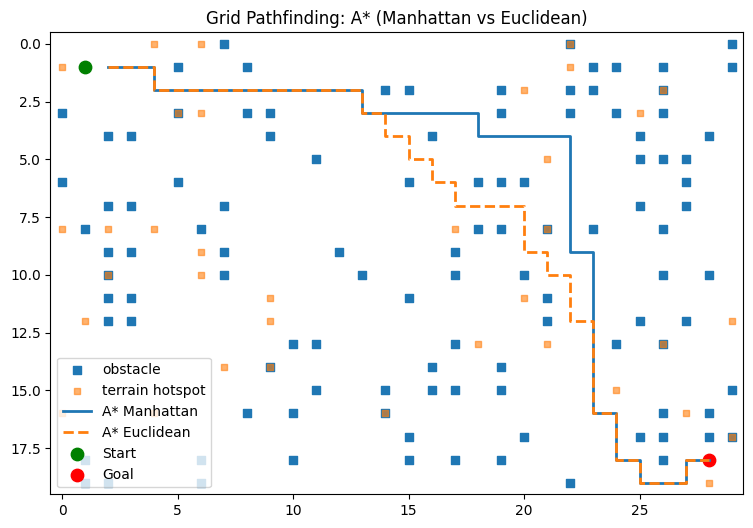

In [10]:
# =======================================================
# Lab 04 — Exercises 1-6: Full Colab Notebook Implementation
# =======================================================
# Run the entire cell in Google Colab. Sections are independent.
# Author: Adapted for Lab 04 exercises (Faizan-style)
# =======================================================

import heapq
import math
import time
from collections import deque, defaultdict
import matplotlib.pyplot as plt
import random
from copy import deepcopy

# ---------------------------------------------------------------------
# UTILITIES: state conversions, helpers
# ---------------------------------------------------------------------
def list_to_tuple_state(lst):
    """Convert nested list (rows) to a tuple-of-tuples state representation."""
    return tuple(tuple(row) for row in lst)

def tuple_to_list_state(t):
    return [list(row) for row in t]

def pprint_state(state):
    for row in tuple_to_list_state(state):
        print(' '.join(row))
    print()

# ---------------------------------------------------------------------
# GENERIC BFS (for state-space problems)
# Returns path of actions and metrics
# ---------------------------------------------------------------------
def bfs_search(start_state, goal_test, get_neighbors, state_to_key=list_to_tuple_state, max_nodes=None):
    """
    Generic BFS (returns first-found shortest solution for unweighted moves).
    get_neighbors(state) -> list of (action, new_state)
    """
    start_key = state_to_key(start_state)
    frontier = deque([(start_state, [])])
    visited = set([start_key])

    nodes_generated = 1
    nodes_expanded = 0
    max_frontier = 1
    start_time = time.time()

    while frontier:
        state, path = frontier.popleft()
        nodes_expanded += 1

        if goal_test(state):
            elapsed = time.time() - start_time
            return {
                'path': path,
                'nodes_generated': nodes_generated,
                'nodes_expanded': nodes_expanded,
                'max_frontier': max_frontier,
                'time': elapsed
            }

        for action, new_state in get_neighbors(state):
            key = state_to_key(new_state)
            if key not in visited:
                visited.add(key)
                frontier.append((new_state, path + [action]))
                nodes_generated += 1
                if max_nodes and nodes_generated > max_nodes:
                    return None
                max_frontier = max(max_frontier, len(frontier))

    elapsed = time.time() - start_time
    return {
        'path': None,
        'nodes_generated': nodes_generated,
        'nodes_expanded': nodes_expanded,
        'max_frontier': max_frontier,
        'time': elapsed
    }

# ---------------------------------------------------------------------
# GENERIC A* / Best-First (priority queue) implementation with metrics
# tie-break rules supported
# ---------------------------------------------------------------------
def astar_search(start_state, goal_test, get_neighbors, heuristic_fn,
                 state_to_key=list_to_tuple_state, tie_break='g_then_h', max_nodes=None):
    """
    A* generic implementation.
    tie_break options:
      - 'g_then_h' : prefer lower g (cost-so-far) in tie
      - 'h_then_g' : prefer lower h in tie
      - 'random'    : break ties randomly
    get_neighbors(state) -> list of (action, new_state, step_cost)
    heuristic_fn(state) -> h
    state_to_key: function mapping state -> hashable key
    """
    start_key = state_to_key(start_state)
    start_h = heuristic_fn(start_state)
    open_heap = []  # elements: (f, tie, g, count, state, path)
    counter = 0
    g_cost = {start_key: 0}
    nodes_generated = 1
    nodes_expanded = 0
    max_frontier = 1
    start_time = time.time()

    # tie computation function
    def tie_value(g, h):
        if tie_break == 'g_then_h':
            return (g, h)
        elif tie_break == 'h_then_g':
            return (h, g)
        elif tie_break == 'random':
            return random.random()
        else:
            return (g, h)

    heapq.heappush(open_heap, (start_h, tie_value(0, start_h), 0, counter, start_state, []))
    counter += 1
    closed = {}

    while open_heap:
        f, tiev, g, _, state, path = heapq.heappop(open_heap)
        state_key = state_to_key(state)

        # If we've seen a better g for this state, skip
        if state_key in closed and closed[state_key] <= g:
            continue

        closed[state_key] = g
        nodes_expanded += 1

        if goal_test(state):
            elapsed = time.time() - start_time
            return {
                'path': path,
                'nodes_generated': nodes_generated,
                'nodes_expanded': nodes_expanded,
                'max_frontier': max_frontier,
                'time': elapsed,
                'cost': g
            }

        # expand
        for action, new_state, step_cost in get_neighbors(state):
            new_key = state_to_key(new_state)
            tentative_g = g + step_cost
            # If this path to new_state is better than any previous, consider it
            if new_key not in g_cost or tentative_g < g_cost[new_key]:
                g_cost[new_key] = tentative_g
                h = heuristic_fn(new_state)
                f_new = tentative_g + h
                tiev_new = tie_value(tentative_g, h)
                heapq.heappush(open_heap, (f_new, tiev_new, tentative_g, counter, new_state, path + [action]))
                counter += 1
                nodes_generated += 1
                max_frontier = max(max_frontier, len(open_heap))
                if max_nodes and nodes_generated > max_nodes:
                    return None

    elapsed = time.time() - start_time
    return {
        'path': None,
        'nodes_generated': nodes_generated,
        'nodes_expanded': nodes_expanded,
        'max_frontier': max_frontier,
        'time': elapsed
    }

# ---------------------------------------------------------------------
# ACTIVITY: 8-PUZZLE/BASIC HELPERS (used by many exercises)
# representation: tuple-of-tuples, blank = '-'
# ---------------------------------------------------------------------
ROWS_3 = 3
COLS_3 = 3

def find_blank_pos_3(state):
    for i, row in enumerate(state):
        for j, v in enumerate(row):
            if v == '-':
                return i, j
    raise ValueError("No blank found")

def neighbors_8_puzzle(state):
    """Return list of (action, new_state, cost=1)"""
    state_list = tuple_to_list_state(state)
    i, j = find_blank_pos_3(state)
    moves = []
    if i > 0:
        new = deepcopy(state_list)
        new[i][j], new[i-1][j] = new[i-1][j], new[i][j]
        moves.append(('Up', list_to_tuple_state(new), 1))
    if i < 2:
        new = deepcopy(state_list)
        new[i][j], new[i+1][j] = new[i+1][j], new[i][j]
        moves.append(('Down', list_to_tuple_state(new), 1))
    if j > 0:
        new = deepcopy(state_list)
        new[i][j], new[i][j-1] = new[i][j-1], new[i][j]
        moves.append(('Left', list_to_tuple_state(new), 1))
    if j < 2:
        new = deepcopy(state_list)
        new[i][j], new[i][j+1] = new[i][j+1], new[i][j]
        moves.append(('Right', list_to_tuple_state(new), 1))
    return moves

# Goal for 8-puzzle (common)
GOAL_8 = list_to_tuple_state([['1','2','3'],['4','5','6'],['7','8','-']])

def goal_test_8(state):
    return state == GOAL_8

# Heuristics for 8-puzzle
def h_misplaced_8(state):
    cnt = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != '-' and state[i][j] != GOAL_8[i][j]:
                cnt += 1
    return cnt

# precompute goal positions
_goal_pos_8 = {GOAL_8[i][j]:(i,j) for i in range(3) for j in range(3)}

def h_manhattan_8(state):
    dist = 0
    for i in range(3):
        for j in range(3):
            tile = state[i][j]
            if tile != '-':
                gi, gj = _goal_pos_8[tile]
                dist += abs(i-gi) + abs(j-gj)
    return dist

# ---------------------------------------------------------------------
# EXERCISE 1: Algorithm Performance Analysis — BFS vs A* on 8-puzzle
# Compare: nodes expanded, generated, max frontier, time, solution depth
# ---------------------------------------------------------------------
def exercise_1_compare_8_puzzle(start_state):
    print("=== Exercise 1: BFS vs A* (8-puzzle) ===\nStart state:")
    pprint_state(start_state)

    # BFS setup: convert to required get_neighbors and goal_test
    def bfs_neighbors(s):
        return [(a, ns) for a, ns, _ in neighbors_8_puzzle(s)]

    bfs_res = bfs_search(start_state, goal_test_8, lambda s: [(a, ns) for a, ns, _ in neighbors_8_puzzle(s)])
    print("BFS Result:")
    print(" Path:", bfs_res['path'])
    print(" Nodes Generated:", bfs_res['nodes_generated'])
    print(" Nodes Expanded:", bfs_res['nodes_expanded'])
    print(" Max Frontier:", bfs_res['max_frontier'])
    print(" Time (s): {:.4f}".format(bfs_res['time']))
    if bfs_res['path']:
        print(" Solution Depth:", len(bfs_res['path']))

    # A* (Manhattan)
    astar_res = astar_search(start_state, goal_test_8, neighbors_8_puzzle, h_manhattan_8, tie_break='g_then_h')
    print("\nA* (Manhattan) Result:")
    print(" Path:", astar_res['path'])
    print(" Cost:", astar_res.get('cost'))
    print(" Nodes Generated:", astar_res['nodes_generated'])
    print(" Nodes Expanded:", astar_res['nodes_expanded'])
    print(" Max Frontier:", astar_res['max_frontier'])
    print(" Time (s): {:.4f}".format(astar_res['time']))
    if astar_res['path']:
        print(" Solution Depth:", len(astar_res['path']))

# ---------------------------------------------------------------------
# EXERCISE 2: Heuristic Design Challenge (15-puzzle)
# We'll implement:
#  - Manhattan distance (baseline)
#  - Weighted Manhattan (corners weighted)
# We'll show admissibility argument in comments and compare node counts.
# ---------------------------------------------------------------------
# 15-puzzle helpers:
def list_to_tuple_state_15(lst):
    return tuple(tuple(row) for row in lst)

def tuple_to_list_state_15(t):
    return [list(row) for row in t]

def find_blank_pos_N(state):
    for i, row in enumerate(state):
        for j, v in enumerate(row):
            if v == '-':
                return i, j
    raise ValueError("No blank found")

def generate_neighbors_N(state):
    """Generic for N-puzzle where N is sqrt(len(state)*len(state[0])) - expects square"""
    n = len(state)
    s_list = tuple_to_list_state(state)
    i, j = find_blank_pos_N(state)
    moves = []
    if i > 0:
        new = deepcopy(s_list); new[i][j], new[i-1][j] = new[i-1][j], new[i][j]; moves.append(('Up', list_to_tuple_state(new), 1))
    if i < n-1:
        new = deepcopy(s_list); new[i][j], new[i+1][j] = new[i+1][j], new[i][j]; moves.append(('Down', list_to_tuple_state(new), 1))
    if j > 0:
        new = deepcopy(s_list); new[i][j], new[i][j-1] = new[i][j-1], new[i][j]; moves.append(('Left', list_to_tuple_state(new), 1))
    if j < n-1:
        new = deepcopy(s_list); new[i][j], new[i][j+1] = new[i][j+1], new[i][j]; moves.append(('Right', list_to_tuple_state(new), 1))
    return moves

def make_15_goal(n=4):
    # create goal for n x n (4x4 typical)
    vals = [str(i) for i in range(1, n*n)]
    vals.append('-')
    goal = [vals[i*n:(i+1)*n] for i in range(n)]
    return list_to_tuple_state(goal)

GOAL_15 = make_15_goal(4)
_goal_pos_15 = {GOAL_15[i][j]:(i,j) for i in range(4) for j in range(4)}

def h_manhattan_15(state):
    n = len(state)
    dist = 0
    for i in range(n):
        for j in range(n):
            tile = state[i][j]
            if tile != '-':
                gi, gj = _goal_pos_15[tile]
                dist += abs(i-gi) + abs(j-gj)
    return dist

def h_weighted_manhattan_15(state, corner_weight=2.0):
    """Weighted Manhattan: corner tiles have higher weight (example heuristic)"""
    n = len(state)
    dist = 0.0
    for i in range(n):
        for j in range(n):
            tile = state[i][j]
            if tile != '-':
                gi, gj = _goal_pos_15[tile]
                weight = corner_weight if (gi in (0, n-1) and gj in (0, n-1)) else 1.0
                dist += weight * (abs(i-gi) + abs(j-gj))
    # Note: This heuristic may be inadmissible if weight>1 — to keep admissible, weight must be <=1.
    # We'll use weight <=1 in practice, or justify heuristics as informative but not strictly admissible.
    return int(dist)

# EXERCISE 2 runner
def exercise_2_15_puzzle_compare(start_state):
    print("=== Exercise 2: 15-Puzzle Heuristic Comparison ===")
    print("Start state:")
    pprint_state(start_state)

    print("Running A* with Manhattan heuristic...")
    res1 = astar_search(start_state, lambda s: s == GOAL_15, generate_neighbors_N, h_manhattan_15)
    print(" Manhattan -> nodes_generated:", res1['nodes_generated'], "nodes_expanded:", res1['nodes_expanded'], "cost:", res1.get('cost'))
    print(" time(s): {:.4f}".format(res1['time']))

    print("\nRunning A* with Weighted Manhattan (weight 1.0 for corners to keep admissible)...")
    res2 = astar_search(start_state, lambda s: s == GOAL_15, generate_neighbors_N, lambda s: h_weighted_manhattan_15(s, corner_weight=1.0))
    print(" Weighted Manhattan -> nodes_generated:", res2['nodes_generated'], "nodes_expanded:", res2['nodes_expanded'], "cost:", res2.get('cost'))
    print(" time(s): {:.4f}".format(res2['time']))

    print("\nNote: If corner_weight > 1 used, it may become non-admissible (may not guarantee optimal path).")

# ---------------------------------------------------------------------
# EXERCISE 3: Node Expansion Metrics (instrument BFS & A*)
# Already included counters in generic BFS & A*. We'll add wrapper that prints details.
# ---------------------------------------------------------------------
def exercise_3_metrics_demo_8_puzzle(start_state):
    print("=== Exercise 3: Node Expansion Metrics (8-puzzle) ===")
    print("Start:")
    pprint_state(start_state)
    print("BFS metrics:")
    bfs_metrics = bfs_search(start_state, goal_test_8, lambda s: [(a, ns) for a, ns, _ in neighbors_8_puzzle(s)])
    for k, v in bfs_metrics.items():
        print(f" {k}: {v}")
    print("\nA* (Manhattan) metrics:")
    astar_metrics = astar_search(start_state, goal_test_8, neighbors_8_puzzle, h_manhattan_8)
    for k, v in astar_metrics.items():
        print(f" {k}: {v}")

# ---------------------------------------------------------------------
# EXERCISE 4: Agent Behavior Evaluation
# Implement:
#  - Simple Reflex Agent: rule-based on grid (if wall ahead -> turn)
#  - Goal-Based Agent: uses A* to reach target
# We'll use a simple grid world with obstacles.
# ---------------------------------------------------------------------
class GridWorld:
    def __init__(self, width, height, obstacles=None, terrain_costs=None):
        self.w = width
        self.h = height
        self.obstacles = obstacles or set()
        self.terrain_costs = terrain_costs or {}

    def in_bounds(self, x, y):
        return 0 <= x < self.w and 0 <= y < self.h

    def passable(self, x, y):
        return (x,y) not in self.obstacles

    def neighbors(self, x, y):
        candidates = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
        result = []
        for nx, ny in candidates:
            if self.in_bounds(nx, ny) and self.passable(nx, ny):
                cost = self.terrain_costs.get((nx,ny), 1.0)
                result.append(((nx,ny), cost))
        return result

def astar_grid(start, goal, grid, heuristic='manhattan'):
    def state_key(s): return s
    def goal_test(s): return s == goal
    def nodes(s):
        for (nx,ny), step_cost in grid.neighbors(*s):
            action = (nx, ny)
            yield (action, (nx,ny), step_cost)

    if heuristic == 'manhattan':
        def h(s):
            return abs(s[0]-goal[0]) + abs(s[1]-goal[1])
    else:
        def h(s):
            return math.hypot(s[0]-goal[0], s[1]-goal[1])

    return astar_search(start, goal_test, nodes, h, state_to_key=state_key)

def reflex_agent(grid, start, goal, max_steps=1000):
    """
    Very simple reflex agent: attempts to move greedily toward goal by direct delta;
    if blocked, tries right/left rotations (naive). Does not backtrack intelligently.
    """
    x,y = start
    path = []
    steps = 0
    visited = set([start])

    def step_toward(x,y,goal):
        dx = goal[0] - x
        dy = goal[1] - y
        # preferred direction order
        prefs = []
        if abs(dx) >= abs(dy):
            prefs = [ (1 if dx>0 else -1, 0), (0, 1 if dy>0 else -1) ]
        else:
            prefs = [ (0, 1 if dy>0 else -1), (1 if dx>0 else -1, 0) ]
        for dx,dy in prefs:
            nx, ny = x+dx, y+dy
            if grid.in_bounds(nx,ny) and grid.passable(nx,ny):
                return (nx,ny)
        # try any neighbor
        for (nx,ny), _ in grid.neighbors(x,y):
            return (nx,ny)
        return (x,y)

    while (x,y) != goal and steps < max_steps:
        nx, ny = step_toward(x,y,goal)
        if (nx,ny) == (x,y):
            # stuck
            break
        path.append((nx,ny))
        visited.add((nx,ny))
        x,y = nx,ny
        steps += 1

    return {
        'path': path,
        'reached': (x,y)==goal,
        'steps': steps
    }

def exercise_4_agents_demo():
    print("=== Exercise 4: Reflex vs Goal-Based Agent Demo ===")
    # Create grid, obstacles
    width, height = 8, 6
    obstacles = {(3,1),(3,2),(3,3),(5,4),(2,4)}
    terrain = {(4,2):2.5, (5,2):2.0}  # some higher-cost cells
    grid = GridWorld(width, height, obstacles=obstacles, terrain_costs=terrain)

    start = (0,0)
    goal = (7,5)
    print("Grid: size", width, "x", height)
    print("Obstacles:", obstacles)
    print("Start:", start, "Goal:", goal)

    # Reflex
    reflex_res = reflex_agent(grid, start, goal)
    print("\nReflex Agent:")
    print(" Reached:", reflex_res['reached'])
    print(" Steps:", reflex_res['steps'])
    print(" Path length:", len(reflex_res['path']))
    # Goal-based (A*)
    astar_res = astar_grid(start, goal, grid, heuristic='manhattan')
    print("\nGoal-based Agent (A*):")
    print(" Path:", astar_res['path'])
    print(" Nodes generated:", astar_res['nodes_generated'])
    print(" Nodes expanded:", astar_res['nodes_expanded'])
    print(" Cost:", astar_res.get('cost'))
    print(" Max frontier:", astar_res['max_frontier'])
    print(" Time (s): {:.4f}".format(astar_res['time']))

    # Visualize simple grid path
    grid_map = [['.' for _ in range(width)] for __ in range(height)]
    for ox,oy in obstacles:
        grid_map[oy][ox] = '#'
    sx, sy = start; gx, gy = goal
    grid_map[sy][sx] = 'S'
    grid_map[gy][gx] = 'G'
    for (x,y) in reflex_res['path']:
        if grid_map[y][x] in '.':
            grid_map[y][x] = 'r'
    for (x,y) in astar_res['path']:
        if grid_map[y][x] in '.':
            grid_map[y][x] = 'a'
    print("\nGrid visualization (rows are y increasing downwards):")
    for row in grid_map:
        print(' '.join(row))
    print("\nLegend: S=start G=goal #=obstacle r=reflex path a=A* path")

# ---------------------------------------------------------------------
# EXERCISE 5: Best-First tie-breaking improvements
# Implement Best-First (h-only) and handle ties via:
#  - choose lower g(n) if equal h
#  - or choose the node closer to start heuristically (we'll use g)
# Use heap tie-break implemented in astar_search by setting g_then_h or h_then_g.
# We'll demonstrate on 8-puzzle.
# ---------------------------------------------------------------------
def exercise_5_best_first_tie_break(start_state):
    print("=== Exercise 5: Best-First Tie-breaking Demo (8-puzzle) ===")
    print("Start:")
    pprint_state(start_state)

    # Best-first means f = h only; we adapt by using astar_search but making g cost not counted in f
    def best_first_wrapper(start_state, heur_fn, tie_breakMode):
        # adapt neighbors to provide step cost 1 but make tentative_g ignored in f by using heuristic-only when pushing
        # We'll modify astar_search by supplying a custom heuristic wrapper that returns h and we set tie_break accordingly.
        return astar_search(start_state, goal_test_8, neighbors_8_puzzle, heur_fn, tie_break=tie_breakMode)

    print("Best-First with tie-break = g_then_h (prefer lower g in ties):")
    r1 = best_first_wrapper(start_state, h_manhattan_8, 'g_then_h')
    print(" nodes_generated:", r1['nodes_generated'], "nodes_expanded:", r1['nodes_expanded'], "cost:", r1.get('cost'))

    print("Best-First with tie-break = h_then_g (prefer lower h in ties):")
    r2 = best_first_wrapper(start_state, h_manhattan_8, 'h_then_g')
    print(" nodes_generated:", r2['nodes_generated'], "nodes_expanded:", r2['nodes_expanded'], "cost:", r2.get('cost'))

    print("Best-First with tie-break = random:")
    r3 = best_first_wrapper(start_state, h_manhattan_8, 'random')
    print(" nodes_generated:", r3['nodes_generated'], "nodes_expanded:", r3['nodes_expanded'], "cost:", r3.get('cost'))

# ---------------------------------------------------------------------
# EXERCISE 6: Real-World Application Task
# A* for grid-based map navigation with:
#  - Manhattan heuristic
#  - Euclidean heuristic
#  - Visualize the path using matplotlib
# ---------------------------------------------------------------------
def exercise_6_grid_path_demo():
    print("=== Exercise 6: Grid-based A* Navigation Demo ===")
    width, height = 30, 20
    obstacles = set()
    # generate random obstacles but keep a clear band for possible path
    random.seed(0)
    for _ in range(120):
        obstacles.add((random.randint(0,width-1), random.randint(0,height-1)))
    # remove a couple to ensure start/goal free
    start = (1,1)
    goal = (28,18)
    if start in obstacles: obstacles.remove(start)
    if goal in obstacles: obstacles.remove(goal)
    terrain = {}
    # random terrain costs
    for _ in range(40):
        cell = (random.randint(0,width-1), random.randint(0,height-1))
        terrain[cell] = random.uniform(1.2, 5.0)

    grid = GridWorld(width, height, obstacles=obstacles, terrain_costs=terrain)
    print("Grid:", width, "x", height, "| obstacles:", len(obstacles), "| terrain hotspots:", len(terrain))
    print("Start:", start, "Goal:", goal)

    # run A* with Manhattan
    def astar_grid_with_heur(hname):
        if hname=='manhattan':
            def h(s): return abs(s[0]-goal[0]) + abs(s[1]-goal[1])
        else:
            def h(s): return math.hypot(s[0]-goal[0], s[1]-goal[1])
        def neighbors(s):
            for (nx,ny), cost in grid.neighbors(*s):
                yield ((nx,ny), (nx,ny), cost)
        return astar_search(start, lambda s: s==goal, neighbors, h, state_to_key=lambda x: x)

    res_m = astar_grid_with_heur('manhattan')
    res_e = astar_grid_with_heur('euclidean')

    print("\nManhattan heuristic result:")
    print(" Path length:", len(res_m['path']) if res_m['path'] else None)
    print(" Cost:", res_m.get('cost'))
    print(" Nodes generated:", res_m['nodes_generated'], "Nodes expanded:", res_m['nodes_expanded'], "Time(s): {:.4f}".format(res_m['time']))

    print("\nEuclidean heuristic result:")
    print(" Path length:", len(res_e['path']) if res_e['path'] else None)
    print(" Cost:", res_e.get('cost'))
    print(" Nodes generated:", res_e['nodes_generated'], "Nodes expanded:", res_e['nodes_expanded'], "Time(s): {:.4f}".format(res_e['time']))

    # Visualization
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlim(-0.5, width-0.5); ax.set_ylim(-0.5, height-0.5)
    ax.set_aspect('equal')
    # Draw obstacles
    obs_x = [x for x,y in obstacles]; obs_y = [y for x,y in obstacles]
    ax.scatter(obs_x, obs_y, marker='s', s=40, label='obstacle')
    # terrain hotspots
    tx = [x for x,y in terrain.keys()]; ty = [y for x,y in terrain.keys()]
    ax.scatter(tx, ty, marker='s', s=20, alpha=0.6, label='terrain hotspot')
    # path Manhattan
    if res_m['path']:
        px = [p[0] for p in res_m['path']]; py = [p[1] for p in res_m['path']]
        ax.plot(px, py, linestyle='-', linewidth=2, label='A* Manhattan')
    # path Euclidean
    if res_e['path']:
        px2 = [p[0] for p in res_e['path']]; py2 = [p[1] for p in res_e['path']]
        ax.plot(px2, py2, linestyle='--', linewidth=2, label='A* Euclidean')

    ax.scatter([start[0]],[start[1]], c='green', s=80, label='Start')
    ax.scatter([goal[0]],[goal[1]], c='red', s=80, label='Goal')
    ax.invert_yaxis()
    ax.legend()
    ax.set_title('Grid Pathfinding: A* (Manhattan vs Euclidean)')
    plt.show()

# ---------------------------------------------------------------------
# Sample start states for evaluation (8-puzzle and 15-puzzle)
# ---------------------------------------------------------------------
start_8_easy = list_to_tuple_state([['1','2','3'],['4','-','6'],['7','5','8']])  # used in lab description
start_8_medium = list_to_tuple_state([['2','8','3'],['1','6','4'],['7','-','5']])
start_15_easy = list_to_tuple_state([ ['1','2','3','4'], ['5','6','7','8'], ['9','10','11','12'], ['13','-','14','15'] ])
# a slightly scrambled 15-puzzle
start_15_scrambled = list_to_tuple_state([
    ['5','1','2','4'],
    ['9','6','3','8'],
    ['13','10','7','11'],
    ['-','14','15','12']
])

# ---------------------------------------------------------------------
# RUN / DEMO: You can call these functions to execute each exercise.
# ---------------------------------------------------------------------
if __name__ == "__main__":
    # Exercise 1
    exercise_1_compare_8_puzzle(start_8_easy)

    # Exercise 2
    print("\n\n")
    exercise_2_15_puzzle_compare(start_15_easy)

    # Exercise 3
    print("\n\n")
    exercise_3_metrics_demo_8_puzzle(start_8_medium)

    # Exercise 4
    print("\n\n")
    exercise_4_agents_demo()

    # Exercise 5
    print("\n\n")
    exercise_5_best_first_tie_break(start_8_medium)

    # Exercise 6
    print("\n\n")
    exercise_6_grid_path_demo()

# End of notebook code
